In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
print("Num GPus Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPus Available:  1


### Model Training Using Generated Data

In [4]:
df = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\generated_df.csv')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.124115,-1.599393,-0.149914,2.109682,0.038543,0.595675,0.644721,0.317964,-0.369205,1.019132,...,-0.249379,0.298205,0.246104,-0.714229,-0.171008,0.274035,-0.646160,-0.378601,-0.306242,0
1,-0.140221,-0.077036,0.114725,-0.068618,0.045462,-0.106829,0.094702,-0.111777,-0.072793,-0.062311,...,-0.019231,-0.002653,0.107842,-0.052991,-0.230395,-0.069105,-0.124035,-0.172561,-0.072274,1
2,-0.947813,-3.226223,-3.263305,-1.845165,0.003520,-4.396491,1.738821,5.760154,-0.029454,-0.901879,...,0.983785,0.114422,3.552622,-0.124398,0.141898,0.793311,-0.359761,0.257221,5.835037,0
3,0.521871,1.874811,-0.451824,-1.223864,0.202895,0.597169,1.184379,-0.439232,0.323480,0.519073,...,0.433782,1.543418,-0.054433,-1.532265,-0.004131,0.728989,0.002979,-0.084599,-0.256801,0
4,-1.136310,-1.142740,1.468732,0.241103,0.625281,0.338581,0.776647,-0.039810,0.842324,-0.265041,...,0.089044,0.369480,-0.235014,-1.353952,0.013564,-0.087556,0.501524,0.251930,-0.319940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368721,1.360712,0.149260,0.988698,-0.605170,-0.788264,1.238822,-0.203064,0.861209,0.067349,-0.279204,...,-0.326673,-0.816542,0.008957,-0.010456,-0.377837,0.128193,0.219217,0.068558,-0.349773,0
368722,-0.144409,-0.056656,0.148645,-0.104169,0.046285,-0.127849,-0.003682,-0.101806,-0.062445,-0.060322,...,0.030523,-0.052311,0.109520,-0.045674,-0.214116,-0.088019,-0.053956,-0.185627,-0.087897,1
368723,-0.312295,1.259310,-0.049484,-0.721776,0.071903,1.864771,3.635628,-0.821682,0.929256,0.128685,...,0.070189,0.104264,-0.107993,1.004823,0.674600,-0.275199,0.045933,0.025074,-0.335356,0
368724,-0.132160,1.982903,-0.134427,-1.161183,0.472515,-0.043755,-1.080473,0.306983,-0.373167,0.454594,...,-0.212230,-0.472417,0.248672,0.025584,-0.195097,0.272711,-0.071660,-0.055715,-0.195658,0


In [6]:
df['Class'].value_counts()

Class
0    283253
1     85473
Name: count, dtype: int64

In [7]:
features = df.drop('Class',axis=1)
target = df['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=42)

#### Logistic Regression Model

In [8]:
#the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter':[1000,2000,5000]
}

In [9]:
# Create a GridSearchCV object
gscv = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [10]:
# Fit the GridSearchCV object to the training data
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [1000, 2000, 5000],
                         'solver': ['liblinear', 'lbfgs']})

In [11]:
best_params = gscv.best_params_

In [12]:
lgt = LogisticRegression(**best_params)
lgt.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [13]:
y_pred = lgt.predict(X_test)

In [14]:
accuracy_lgt = accuracy_score(y_test, y_pred)
precision_lgt = precision_score(y_test, y_pred)
recall_lgt = recall_score(y_test, y_pred)
f1_score_lgt = f1_score(y_test, y_pred)
mcc_lgt = matthews_corrcoef(y_test, y_pred)

print("Accuracy:", accuracy_lgt)
print("Precision:", precision_lgt)
print("Recall:", recall_lgt)
print("F1-score:", f1_score_lgt)
print("MCC:", mcc_lgt)

Accuracy: 0.9211882333797393
Precision: 0.8366554388745789
Recall: 0.8212299194834494
F1-score: 0.8288709170854272
MCC: 0.7777390743755798


In [15]:
cm_logit = confusion_matrix(y_test, y_pred)
print(cm_logit)

[[80787  4122]
 [ 4596 21113]]


#### SVM Model

In [9]:
param_grid_svm = {'C': [1, 10,100],  
              'gamma': [1, 0.1, 0.01], 
              } 

In [12]:
# Create a GridSearchCV object
gscv_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)

In [13]:
gscv_svm.fit(X_train, y_train) 

In [ ]:
best_params_svm = gscv_svm.best_params_

In [36]:
svm = SVC(C=100, gamma=0.001)

svm.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [37]:
y_pred_svm = svm.predict(X_test)

In [38]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_score_svm)
print("MCC:", mcc_svm)

Accuracy: 0.9995027933970964
Precision: 0.9996494234964163
Recall: 0.9982107433194601
F1-score: 0.9989295654035538
MCC: 0.9986061992791503


In [39]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[84900     9]
 [   46 25663]]


#### Decision Tree

In [40]:
dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=10)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=10)

In [41]:
y_pred_dtree = dtree.predict(X_test)

In [42]:
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
f1_score_dtree = f1_score(y_test, y_pred_dtree)
mcc_dtree = matthews_corrcoef(y_test, y_pred_dtree)

print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1-score:", f1_score_dtree)
print("MCC:", mcc_dtree)

Accuracy: 0.9969353993021027
Precision: 0.9922772430922074
Recall: 0.9945544361896612
F1-score: 0.9934145346465413
MCC: 0.9914186954382422


In [43]:
cm_dt = confusion_matrix(y_test, y_pred_dtree)
print(cm_dt)

[[84710   199]
 [  140 25569]]


### CNN

In [12]:
X_val, X_test1, y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [13]:
X_train1 = X_train.to_numpy()
y_train1 = y_train.to_numpy()
X_val1 = X_val.to_numpy()
y_val1 = y_val.to_numpy()
X_test1 = X_test1.to_numpy()
y_test1 = y_test1.to_numpy()

In [14]:
X_train1 = X_train1.reshape(X_train1.shape[0],X_train1.shape[1],1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1],1)
X_train1.shape, X_test1.shape

((258108, 30, 1), (55309, 30, 1))

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
import keras_tuner
from tensorflow import keras
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

Using TensorFlow backend


C:\Users\Ravin\AppData\Local\Temp\ipykernel_24908\598770444.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [16]:
#import model
model=Sequential()

In [19]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv1D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='relu')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model


In [20]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='D:/Uni Docs/DSC4996/Dynamic_fraud_detection_system/CNN_output',project_name="Hyperparameter Tuning of CNN_GenData")

In [21]:
tuner.search(X_train1, y_train1, epochs=5, validation_data=(X_val1, y_val1))

Trial 5 Complete [00h 03m 18s]
val_accuracy: 0.7666383385658264

Best val_accuracy So Far: 0.9986982345581055
Total elapsed time: 00h 16m 30s


In [23]:
best_model=tuner.get_best_models(num_models=1)[0]

In [25]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (258108, 28, 112)         448       
                                                                 
 batch_normalization (BatchN  (258108, 28, 112)        448       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (258108, 28, 112)         0         
                                                                 
 conv1d_1 (Conv1D)           (258108, 24, 48)          26928     
                                                                 
 batch_normalization_1 (Batc  (258108, 24, 48)         192       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (258108, 24, 48)          0

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('D:/Uni Docs/DSC4996/Dynamic_fraud_detection_system/CNN_output/best_model_us_data.h5', save_best_only=True)

In [27]:
# fitting the model
cnn_fit =best_model.fit(X_train1,y_train1,epochs=100,validation_data=(X_val1,y_val1),callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
8066/8066 [==============================] - 37s 5ms/step - loss: 0.0500 - accuracy: 0.9967 - val_loss: 0.0201 - val_accuracy: 0.9987
Epoch 2/100
8066/8066 [==============================] - 37s 5ms/step - loss: 0.0321 - accuracy: 0.9979 - val_loss: 0.0201 - val_accuracy: 0.9987
Epoch 3/100
8066/8066 [==============================] - 36s 5ms/step - loss: 0.0373 - accuracy: 0.9976 - val_loss: 0.0204 - val_accuracy: 0.9987
Epoch 4/100
8066/8066 [==============================] - 36s 5ms/step - loss: 0.0580 - accuracy: 0.9962 - val_loss: 0.0201 - val_accuracy: 0.9987
Epoch 5/100
8066/8066 [==============================] - 36s 4ms/step - loss: 0.0226 - accuracy: 0.9985 - val_loss: 0.0201 - val_accuracy: 0.9987
Epoch 6/100
8066/8066 [==============================] - 36s 4ms/step - loss: 0.0575 - accuracy: 0.9963 - val_loss: 0.0204 - val_accuracy: 0.9987


In [28]:
# plot
def plot_learningcurve(cnn_fit,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, cnn_fit.history['accuracy'])
  plt.plot(epoch, cnn_fit.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, cnn_fit.history['loss'])
  plt.plot(epoch, cnn_fit.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

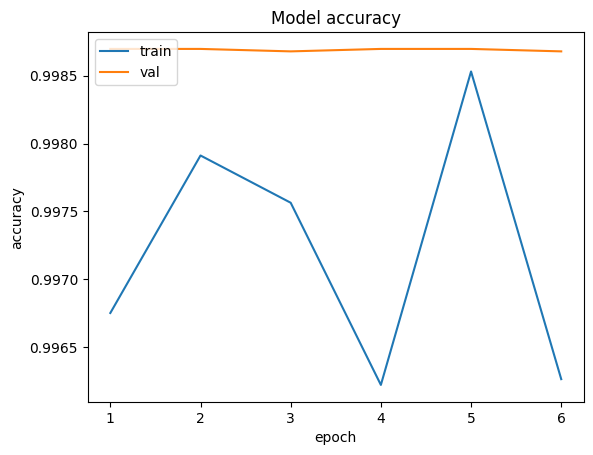

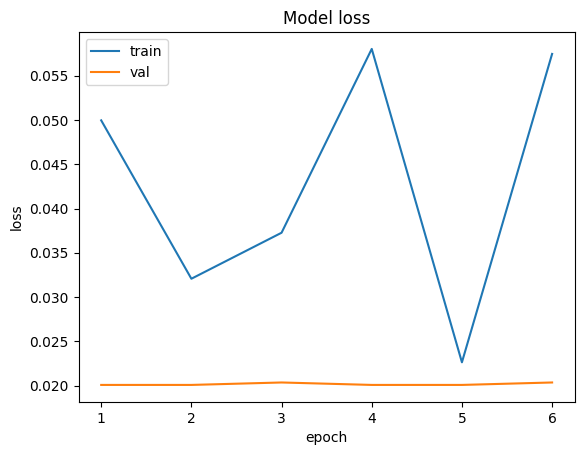

In [29]:
plot_learningcurve(cnn_fit,6)

In [30]:
y_pred_cnn = best_model.predict(X_test1)

1729/1729 [==============================] - 2s 1ms/step


In [31]:
import numpy as np

def predict_classes(probs, threshold=0.5):

  classes = np.zeros_like(probs, dtype=int)
  classes[probs >= threshold] = 1
  return classes


In [32]:
preds = predict_classes(y_pred_cnn)

In [33]:
accuracy_cnn = accuracy_score(y_test1, preds)
precision_cnn = precision_score(y_test1, preds)
recall_cnn = recall_score(y_test1, preds)
f1_score_cnn = f1_score(y_test1, preds)
mcc_cnn = matthews_corrcoef(y_test1, preds)

print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("F1-score:", f1_score_cnn)
print("Recall:", recall_cnn)
print("MCC:", mcc_cnn)

Accuracy: 0.9987163029525032
Precision: 1.0
F1-score: 0.9972192848470607
Recall: 0.9944539915638182
MCC: 0.9963913447315585


In [34]:
cm_dt = confusion_matrix(y_test1, preds)
print(cm_dt)

[[42507     0]
 [   71 12731]]
